<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_1%2B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [306]:
def funkcja_przystosowania(x):
    return math.sin(x / 10.0) * math.sin(x / 200.0)

def algorytm_1_plus_1(rozrzut, wsp_przyrostu, l_iteracji, zakres_zmienności):
    x = random.uniform(-zakres_zmienności, zakres_zmienności)
    x_start = x
    y = funkcja_przystosowania(x)
    x_list = [x]
    y_list = [y]

    for i in range(l_iteracji):
        xpot = x + random.uniform(-rozrzut, rozrzut)

        if xpot < -zakres_zmienności:
            xpot = zakres_zmienności
        elif xpot > zakres_zmienności:
            xpot = -zakres_zmienności

        ypot = funkcja_przystosowania(xpot)

        if ypot >= y:
            x = xpot
            y = ypot
            rozrzut *= wsp_przyrostu
            x_list.append(x)
            y_list.append(y)
        else:
            rozrzut /= wsp_przyrostu
        print(f"{i+1}. iteracja: ({x}, {y}) z rozrzutem {rozrzut}")

    return x, y, x_start, [x_list, y_list]

In [307]:
rozrzut = 0.1
wsp_przyrostu = 1.1
l_iteracji = 1000
zakres_zmienności = 25.0

najlepsze_x, najlepsze_y, startowe_x, listy = algorytm_1_plus_1(rozrzut, wsp_przyrostu, l_iteracji, zakres_zmienności)
print(f"Wyniki dla {l_iteracji}. iteracji ze startowego x {startowe_x}")
print("Najlepsza wartość x: ", najlepsze_x)
print("Wartość funkcji przystosowania dla najlepszego x: ", najlepsze_y)

1. iteracja: (1.7479262572828274, 0.0015198368523995337) z rozrzutem 0.11000000000000001
2. iteracja: (1.7479262572828274, 0.0015198368523995337) z rozrzutem 0.1
3. iteracja: (1.7479262572828274, 0.0015198368523995337) z rozrzutem 0.09090909090909091
4. iteracja: (1.7479262572828274, 0.0015198368523995337) z rozrzutem 0.08264462809917356
5. iteracja: (1.7837301284448983, 0.0015824030413483098) z rozrzutem 0.09090909090909093
6. iteracja: (1.8202139955596037, 0.001647434264646585) z rozrzutem 0.10000000000000002
7. iteracja: (1.877884730730223, 0.0017528548181426507) z rozrzutem 0.11000000000000003
8. iteracja: (1.886794998804507, 0.0017694289143156809) z rozrzutem 0.12100000000000004
9. iteracja: (1.886794998804507, 0.0017694289143156809) z rozrzutem 0.11000000000000003
10. iteracja: (1.886794998804507, 0.0017694289143156809) z rozrzutem 0.10000000000000002
11. iteracja: (1.9539684914906292, 0.001896841867636525) z rozrzutem 0.11000000000000003
12. iteracja: (2.0625498400671103, 0.0021

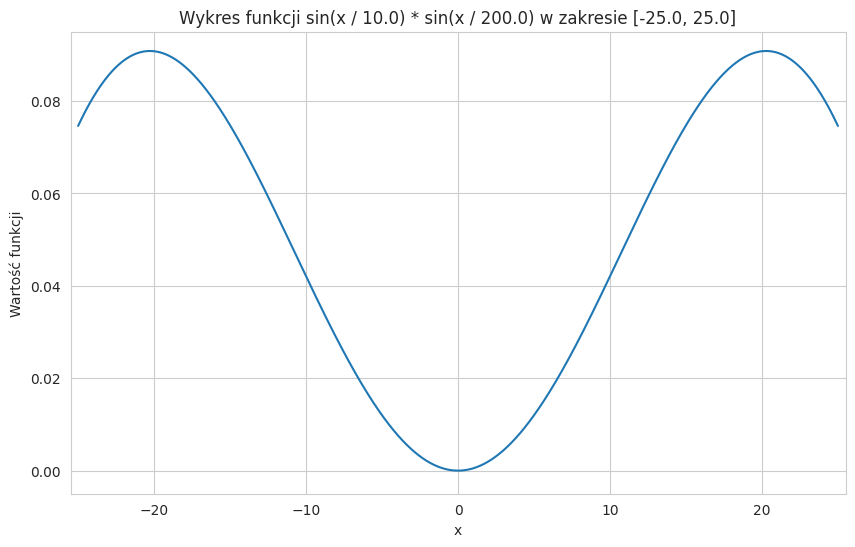

In [308]:
x = np.linspace(zakres_zmienności, -zakres_zmienności, 1000)
y = [math.sin(val / 10.0) * math.sin(val / 200.0) for val in x]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-0.005,0.095)
plt.xlim(-zakres_zmienności-0.5, zakres_zmienności+0.5)
sns.lineplot(x=x, y=y)
plt.title(f"Wykres funkcji sin(x / 10.0) * sin(x / 200.0) w zakresie [{-zakres_zmienności}, {zakres_zmienności}]")
plt.xlabel("x")
plt.ylabel("Wartość funkcji")
plt.show()

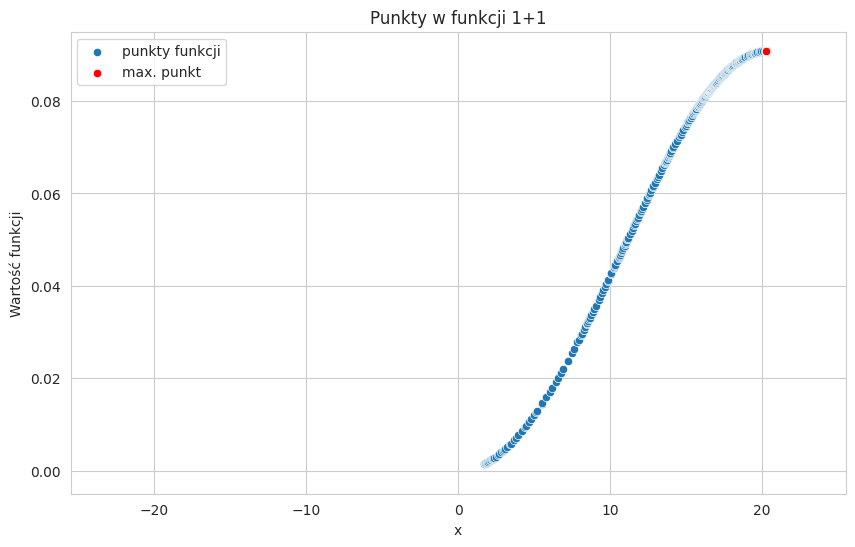

In [309]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-0.005,0.095)
plt.xlim(-zakres_zmienności-0.5, zakres_zmienności+0.5)
sns.scatterplot(x=listy[0], y=listy[1], label = 'punkty funkcji')
sns.scatterplot(x=[najlepsze_x], y= [najlepsze_y], c='r', label = 'max. punkt')
plt.legend()
plt.title(f"Punkty w funkcji 1+1")
plt.xlabel("x")
plt.ylabel("Wartość funkcji")
plt.show()

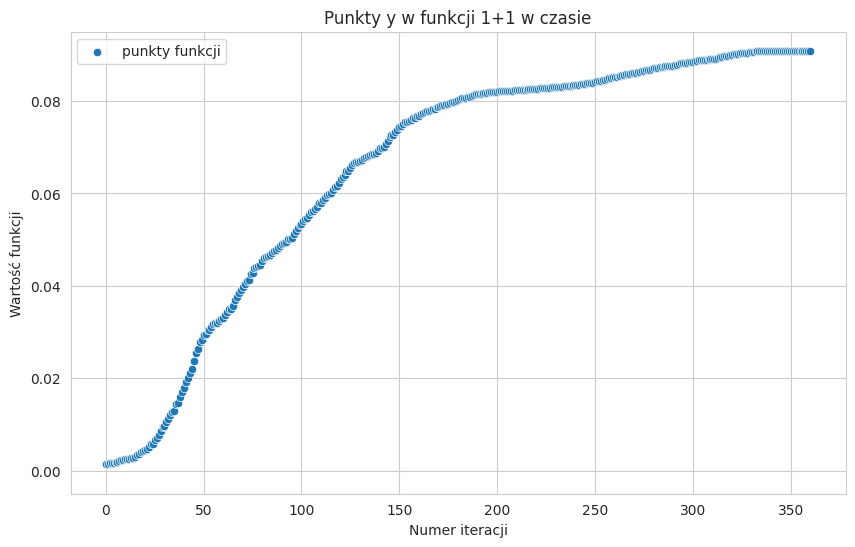

In [310]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-0.005,0.095)
sns.scatterplot(x=[i for i in range(len(listy[0]))], y=listy[1], label = 'punkty funkcji')
plt.legend()
plt.title(f"Punkty y w funkcji 1+1 w czasie")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji")
plt.show()

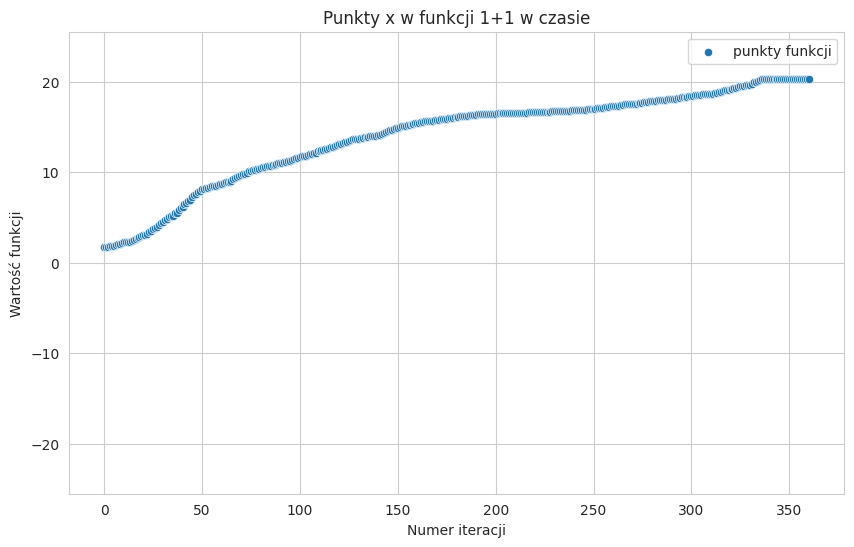

In [311]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-zakres_zmienności-0.5, zakres_zmienności+0.5)
sns.scatterplot(x=[i for i in range(len(listy[0]))], y=listy[0], label = 'punkty funkcji')
plt.legend()
plt.title(f"Punkty x w funkcji 1+1 w czasie")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji")
plt.show()